In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df= pd.read_csv('../datasets/winequality-red.csv')
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


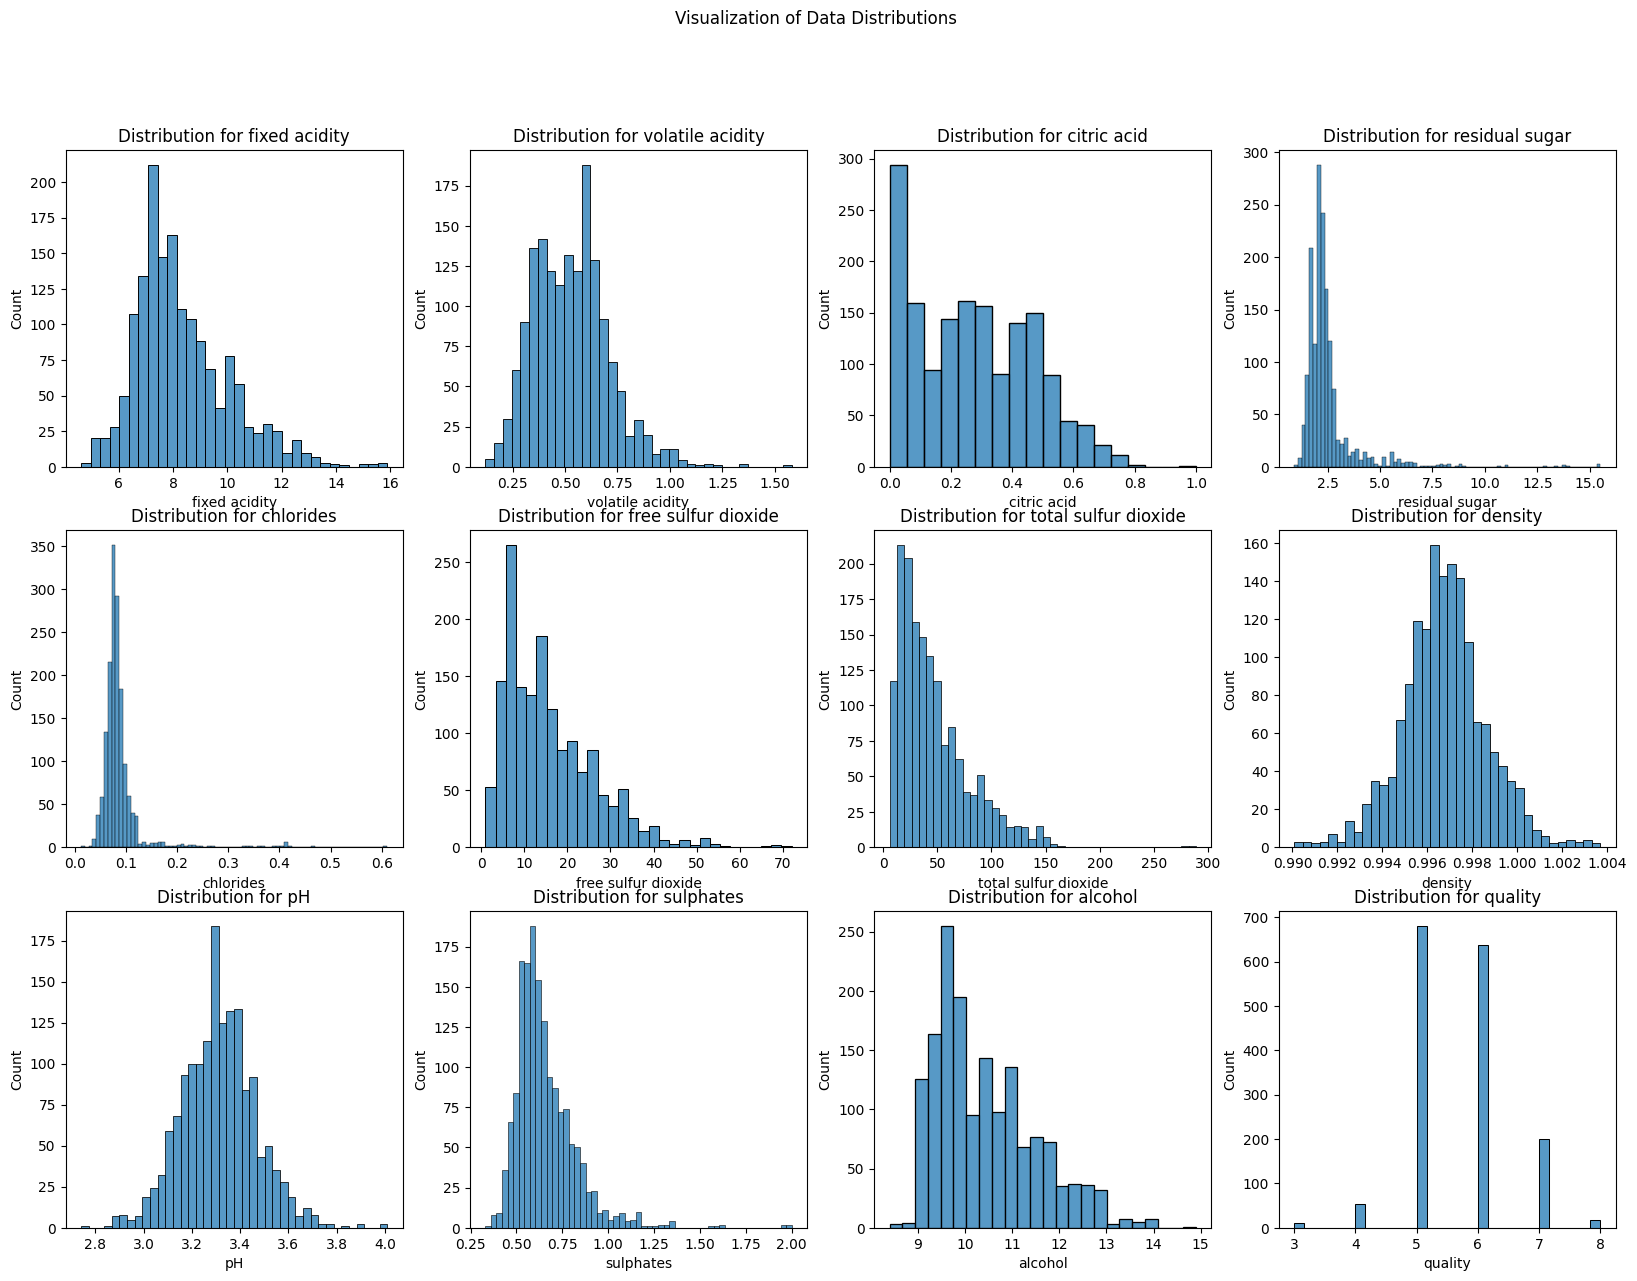

In [19]:
fig, axes= plt.subplots(3,4, figsize= (20, 14))
fig.suptitle('Visualization of Data Distributions')
axes= axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(data= df, x= col, ax= axes[i])
    axes[i].set_title(f'Distribution for {col}')
    axes[i].set_xlabel(col)

In [51]:
df['chlorides'].quantile([0.01, 0.5, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1])

chloride_cap= df['chlorides'].quantile(0.9)
filt= df['chlorides'] > chloride_cap
df.loc[filt, 'chlorides'] = chloride_cap


In [52]:
df['chlorides'].quantile([0.01, 0.5, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1])


0.01    0.04298
0.50    0.07900
0.10    0.06000
0.25    0.07000
0.50    0.07900
0.75    0.09000
0.90    0.10900
0.99    0.10900
1.00    0.10900
Name: chlorides, dtype: float64

In [58]:
df['residual sugar'].quantile([0.01, 0.5, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1])

sugar_cap= df['residual sugar'].quantile(0.9)
filt= df['residual sugar'] > sugar_cap
df.loc[filt, 'residual sugar']= sugar_cap


df['residual sugar'].quantile([0.01, 0.5, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1])

0.01    1.4
0.50    2.2
0.10    1.7
0.25    1.9
0.50    2.2
0.75    2.6
0.90    3.6
0.99    3.6
1.00    3.6
Name: residual sugar, dtype: float64

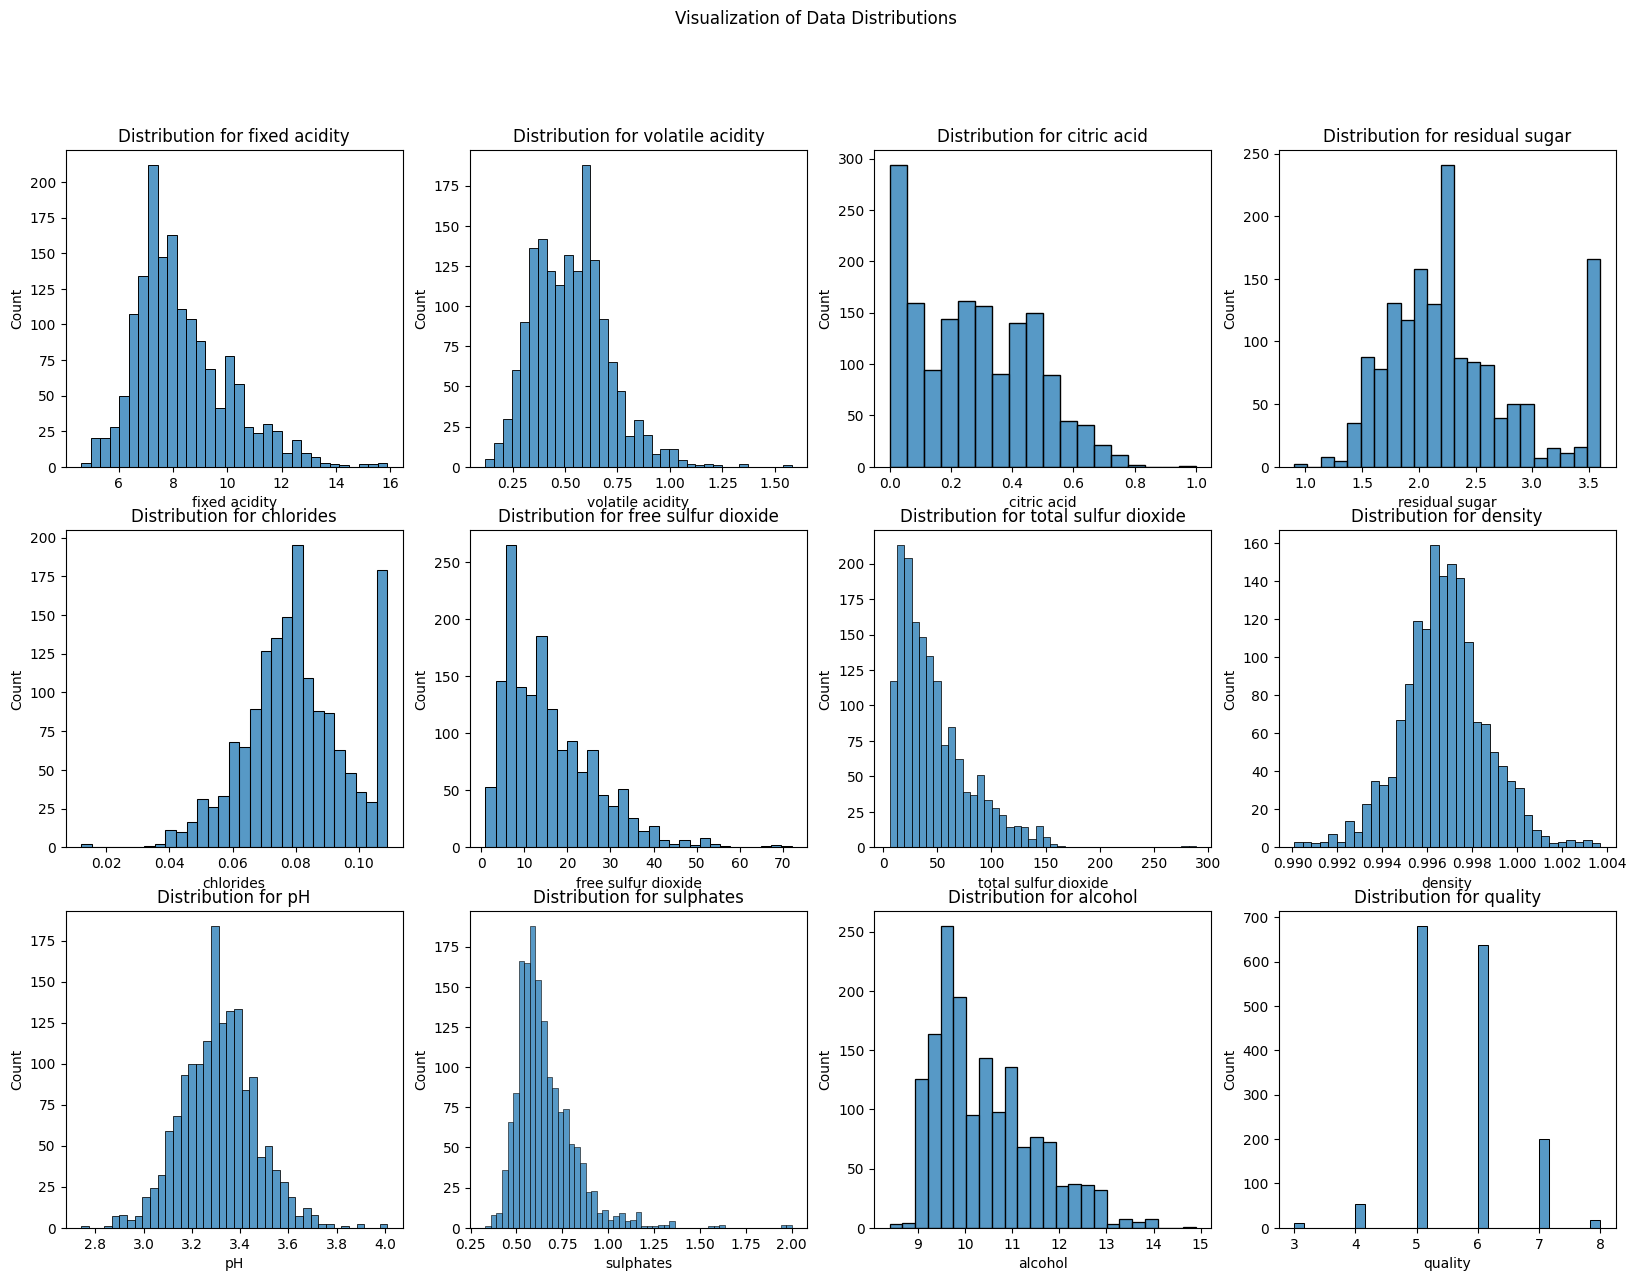

In [59]:
fig, axes= plt.subplots(3,4, figsize= (20, 14))
fig.suptitle('Visualization of Data Distributions')
axes= axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(data= df, x= col, ax= axes[i])
    axes[i].set_title(f'Distribution for {col}')
    axes[i].set_xlabel(col)